<a href="https://colab.research.google.com/github/CyTusSi1ver1197/Fundamental-ML/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
# If using gg Colab  ## ctrl + /  to comment or uncomment
import gdown
gdown.download('https://drive.google.com/uc?/export=download&id=1sgyyTTgklZDFosHDSbpkSu76OXAIm4C5')
df = pd.read_csv("./icml_face_data.csv")

df.head()

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1sgyyTTgklZDFosHDSbpkSu76OXAIm4C5
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1sgyyTTgklZDFosHDSbpkSu76OXAIm4C5&confirm=t&uuid=3d850f64-7440-4b45-9367-7fef65eee540
To: /content/icml_face_data.csv
100%|██████████| 301M/301M [00:05<00:00, 53.0MB/s]


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
## load dataset here - If using local
## Addding a line to tessing the pull request change
# df = pd.read_csv("../data/icml_face_data.csv")
# df.head()

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)

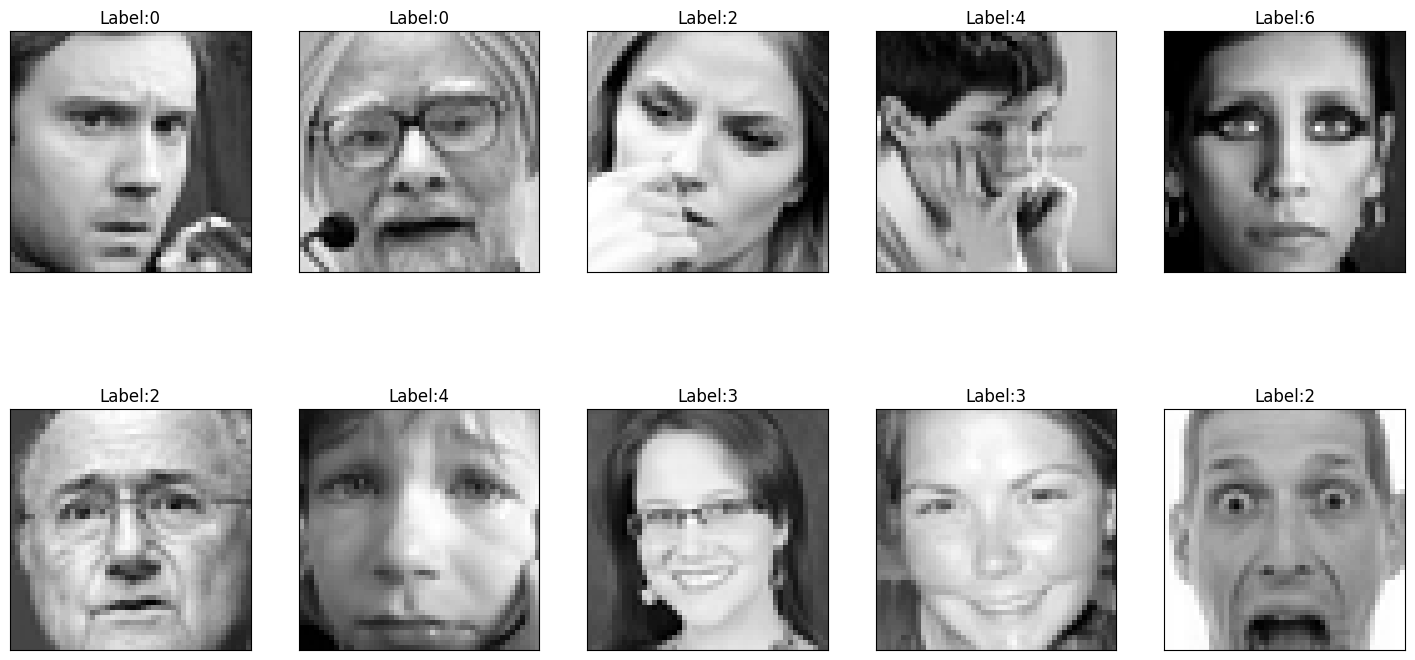

In [6]:
## showing images here
show_img(images, labels)

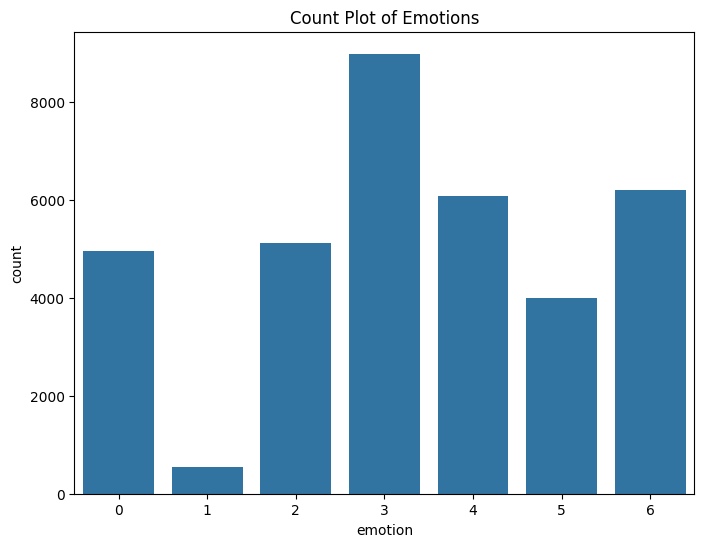

In [8]:
# Initialize the plot
plt.figure(figsize=(8, 6))

# Create the count plot
sns.countplot(x='emotion', data=df)

# Add a title
plt.title('Count Plot of Emotions')

# Show the plot
plt.show()

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [9]:
## Step 1: Reshape images to 2D-array
flattened_images = images.reshape(images.shape[0], -1)

print(flattened_images.dtype)

len(flattened_images[0])

float64


2304

In [10]:
## Step 2: Unit vector scaling image data by divde to 255: [0-255] -> [0-1]
flattened_images = flattened_images / 255.0

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA(n_components=2)
# pca.fit(images) ## modify images' array to the appropriate shape

## Step 3: Create principal components
pca_data = pca.fit(flattened_images)

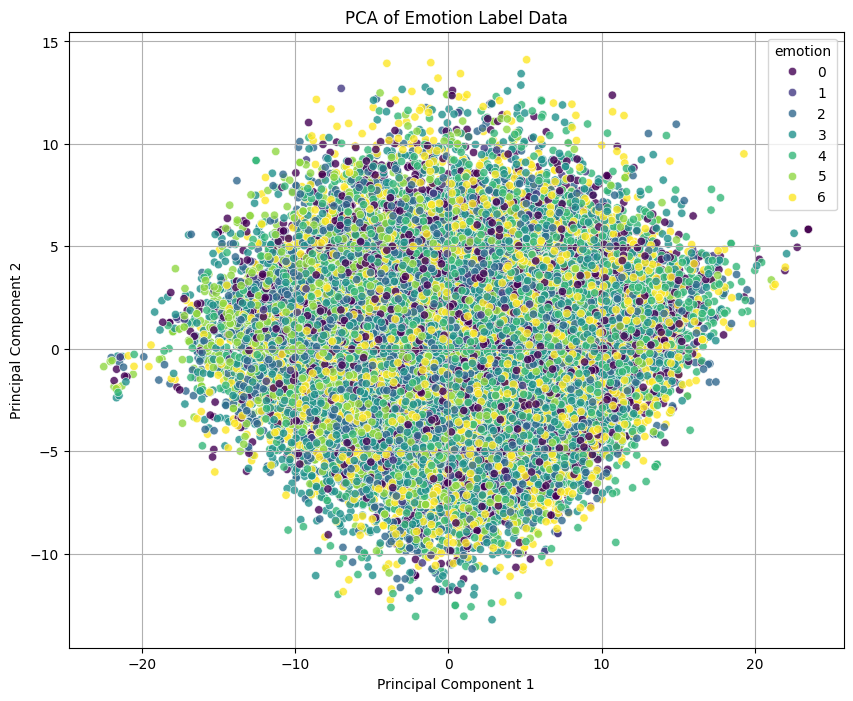

In [12]:
X_data = pca.transform(flattened_images)

scatter_df = pd.DataFrame(X_data[:,:2], columns=['PC 1', 'PC 2'])
scatter_df['emotion'] = df['emotion'].values

# Plot the results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC 1', y='PC 2', hue='emotion', palette='viridis', data=scatter_df, legend='full', alpha=0.8)
plt.title('PCA of Emotion Label Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
## transform for visualizing here
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape
# images_pca.shape

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [85]:
pca = PCA()
pca.fit(flattened_images)

# cut-off 95% variances coverages of PCA cumsum
threshold = 0.95
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Optimal number of principal components (threshold=0.95): {optimal_components}")

Optimal number of principal components (threshold=0.95): 255


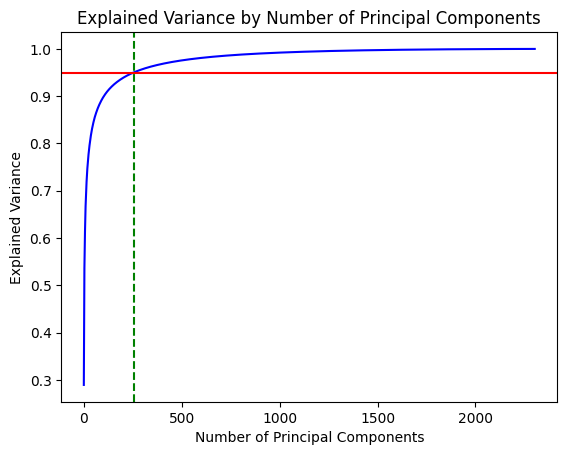

In [14]:
# Plot cumulative explained variance
plt.plot(cumulative_explained_variance, linestyle='-', color='b')
plt.axhline(y=threshold, color='r', linestyle='-')

# Plot vertical line indicating optimal number of PCs
plt.axvline(x=optimal_components-1, color='g', linestyle='--')

# Add labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Principal Components')

# Show plot
plt.show()

- 95% Information: Retaining 95% of the variance ensures that most of the important information in the data is preserved. This means that the reduced dataset still captures the essential patterns and structures present in the original high-dimensional data.

- Reduced Complexity: Reducing the number of features from 2034 to 255 simplifies the model. Lower-dimensional data is easier to process, requires less computational power, and can reduce the time needed for training and inference.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import random
random.seed(42)

In [16]:
flattened_images.shape

(35887, 2304)

In [43]:
## splitting data into train/val/test subsets here for Original data
X_train, X_test, y_train, y_test = train_test_split(
    flattened_images, labels, test_size=0.2, random_state=42)

In [44]:
## PCA with 255 components
pca = PCA(n_components=255)

## split data for Transformed data
X_train_pca = pca.fit_transform(X_train)
y_train_pca = y_train

X_test_pca = pca.transform(X_test)
y_test_pca = y_test

### **3.1. Logistic Regression**

In [45]:
def build_model_lr(X, y, GridSearch=False):
    # Define pipeline for Logistic Regression
    pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
    ])


    if GridSearch==False:
      pipe_lr.fit(X, y)
      return pipe_lr

    else:
      # Hyperparameters for GridSearchCV
      param_grid_lr = {
      'clf__C': [0.1, 1, 10],
      'clf__solver': ['liblinear']
      }

      # Perform GridSearchCV
      grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1)
      grid_lr.fit(X, y)

      print("Best parameter (CV score=%0.3f):" % grid_lr.best_score_)
      print(grid_lr.best_params_)

      return grid_lr

#### Original data

In [46]:
# fit model
lr = build_model_lr(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# training accuracy
y_pred = lr.predict(X_test)
acc_test_lr = accuracy_score(y_test, y_pred)
print(acc_test_lr)

0.35358038450821955


In [ ]:
# ## GridSearch
# lr_grid = build_model_lr(X_train, y_train, GridSearch=True)
# # training accuracy
# y_pred = lr_grid.predict(X_val)
# acc_val_lr_grid = accuracy_score(y_val, y_pred)
# print(acc_val_lr_grid)

#### Transformed data

In [48]:
# fit model
lr_pca = build_model_lr(X_train_pca, y_train_pca)

In [49]:
# training accuracy
y_pred_pca = lr_pca.predict(X_test_pca)
acc_test_lr_pca = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_lr_pca)

0.3684870437447757


In [50]:
## GridSearch
lr_pca_grid = build_model_lr(X_train_pca, y_train_pca, GridSearch=True)
# training accuracy
y_pred_pca = lr_pca_grid.predict(X_test_pca)
acc_test_lr_pca_grid = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_lr_pca_grid)

Best parameter (CV score=0.373):
{'clf__C': 1, 'clf__solver': 'liblinear'}
0.36723321259403735


### **3.2. Random Forest**

In [51]:
def build_model_rf(X, y, GridSearch=False):

    # Define pipeline for Random Forest
    pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
    ])

    if GridSearch==False:
      pipe_rf.fit(X, y)
      return pipe_rf

    else:
      # Hyperparameters for GridSearchCV
      param_grid_rf = {
      'clf__n_estimators': [100, 200],
      'clf__max_depth': [None, 10, 20]
      }

      # Perform GridSearchCV
      grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1)
      grid_rf.fit(X, y)

      print("Best parameter (CV score=%0.3f):" % grid_rf.best_score_)
      print(grid_rf.best_params_)

      return grid_rf

#### Original data

In [52]:
# fit model
rf = build_model_rf(X_train, y_train)

In [53]:
# training accuracy
y_pred_rf = rf.predict(X_test)
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(acc_test_rf)

0.45583728057954864


In [ ]:
# ## GridSearch
# rf_grid = build_model_rf(X_train, y_train, GridSearch=True)
# # training accuracy
# y_pred = rf_grid.predict(X_val)
# acc_val_rf_grid = accuracy_score(y_val, y_pred)
# print(acc_val_rf_grid)

#### Transformed data

In [54]:
# fit model
rf_pca = build_model_rf(X_train_pca, y_train_pca)

In [55]:
# training accuracy
y_pred_pca = rf_pca.predict(X_test_pca)
acc_test_rf_pca = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_rf_pca)

0.3917525773195876


In [ ]:
## GridSearch
rf_pca_grid = build_model_rf(X_train_pca, y_train_pca, GridSearch=True)
# training accuracy
y_pred_pca = rf_pca_grid.predict(X_test_pca)
acc_test_rf_pca_grid = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_rf_pca_grid)

### **3.3. KNN**

In [57]:
def build_model_knn(X, y, GridSearch=False):

    # Define pipeline for Random Forest
    pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
    ])

    if GridSearch==False:
      pipe_knn.fit(X, y)
      return pipe_knn

    else:
      # Hyperparameters for GridSearchCV
      param_grid_knn = {
      'clf__n_neighbors': [3, 5, 7, 9, 11],  # Different values for k
      'clf__weights': ['uniform', 'distance'],  # Weight function used in prediction
      'clf__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
      }

      # Perform GridSearchCV
      grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1)
      grid_knn.fit(X, y)

      print("Best parameter (CV score=%0.3f):" % grid_knn.best_score_)
      print(grid_knn.best_params_)

      return grid_knn

In [58]:
# fit model
knn = build_model_knn(X_train, y_train)

In [59]:
# training accuracy
y_pred_knn = knn.predict(X_test)
acc_test_knn = accuracy_score(y_test, y_pred_knn)
print(acc_test_knn)

0.35399832822513233


In [60]:
# # GridSearch
# knn_grid = build_model_knn(X_train, y_train, GridSearch=True)
# # training accuracy
# y_pred = knn_grid.predict(X_val)
# acc_val_knn_grid = accuracy_score(y_val, y_pred)
# print(acc_val_knn_grid)

#### Transformed data

In [61]:
# fit model
knn_pca = build_model_knn(X_train_pca, y_train_pca)

In [62]:
# training accuracy
y_pred_pca = knn_pca.predict(X_test_pca)
acc_test_knn_pca = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_knn_pca)

0.2561994984675397


In [ ]:
## GridSearch
knn_pca_grid = build_model_knn(X_train_pca, y_train_pca, GridSearch=True)
# training accuracy
y_pred_pca = knn_pca_grid.predict(X_test_pca)
acc_test_knn_pca_grid = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_knn_pca_grid)

### **3.4. MLP**

In [64]:
def build_model_mlp(X, y, GridSearch=False):

    # Define pipeline for Random Forest
    pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
    ])

    if GridSearch==False:
      pipe_mlp.fit(X, y)
      return pipe_mlp

    else:
      # Hyperparameters for GridSearchCV
      param_grid_mlp = {
      'clf__hidden_layer_sizes': [(100,), (100, 100)],
      'clf__activation': ['relu', 'tanh'],
      'clf__solver': ['adam'],
      'clf__alpha': [0.0001, 0.001]
      }

      # Perform GridSearchCV
      grid_mlp = GridSearchCV(pipe_mlp, param_grid_mlp, cv=5, n_jobs=-1)
      grid_mlp.fit(X, y)

      print("Best parameter (CV score=%0.3f):" % grid_mlp.best_score_)
      print(grid_mlp.best_params_)

      return grid_mlp

#### Original data

In [65]:
# fit model
mlp = build_model_mlp(X_train, y_train)

In [66]:
# training accuracy
y_pred_mlp = mlp.predict(X_test)
acc_test_mlp = accuracy_score(y_test, y_pred_mlp)
print(acc_test_mlp)

0.40331568682084146


In [ ]:
# # GridSearch
# mlp_grid = build_model_mlp(X_train, y_train, GridSearch=True)
# # training accuracy
# y_pred = mlp_grid.predict(X_val)
# acc_val_mlp_grid = accuracy_score(y_val, y_pred)
# print(acc_val_mlp_grid)

#### Transformed data

In [67]:
# fit model
mlp_pca = build_model_mlp(X_train_pca, y_train_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
# training accuracy
y_pred_pca = mlp_pca.predict(X_test_pca)
acc_test_mlp_pca = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_mlp_pca)

0.37545277235998886


In [ ]:
## GridSearch
mlp_pca_grid = build_model_mlp(X_train_pca, y_train_pca, GridSearch=True)
# training accuracy
y_pred_pca = mlp_pca_grid.predict(X_test_pca)
acc_test_mlp_pca_grid = accuracy_score(y_test_pca, y_pred_pca)
print(acc_test_mlp_pca_grid)

### Compare the performance

In [69]:
from tabulate import tabulate

data_header = ['Model with', 'Original data', 'Transformed data']
data_values = [
      ['Logistic Regression', acc_test_lr, acc_test_lr_pca],
      ['Random Forest', acc_test_rf, acc_test_rf_pca],
      ['KNN', acc_test_knn, acc_test_knn_pca],
      ['MLP', acc_test_mlp, acc_test_mlp_pca]
]

In [70]:
# Generate the table
result = tabulate(
data_values,
headers=data_header,
tablefmt='fancy_grid',
)
# Print the resulting table
print(result)


╒═════════════════════╤═════════════════╤════════════════════╕
│ Model with          │   Original data │   Transformed data │
╞═════════════════════╪═════════════════╪════════════════════╡
│ Logistic Regression │        0.35358  │           0.368487 │
├─────────────────────┼─────────────────┼────────────────────┤
│ Random Forest       │        0.455837 │           0.391753 │
├─────────────────────┼─────────────────┼────────────────────┤
│ KNN                 │        0.353998 │           0.256199 │
├─────────────────────┼─────────────────┼────────────────────┤
│ MLP                 │        0.403316 │           0.375453 │
╘═════════════════════╧═════════════════╧════════════════════╛


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [71]:
## visualize the confusion matrices and classification reports here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = lr.predict(X_test)

print("Performance on logistics Regression model: ")
print("\n")
print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test , y_pred))

wf1_lr = f1_score(y_test, y_pred, average='weighted')

Performance on logistics Regression model: 


Confusion matrix: 
 [[ 203    5  108  257  200   55  157]
 [  14    7   20   22   16    6   17]
 [ 119    2  209  252  195  114  152]
 [ 140    0  138 1054  194   57  182]
 [ 152    4  122  321  311   58  242]
 [  43    1   90  145   71  345  100]
 [ 130    0  109  329  223   78  409]]


Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.21      0.23       985
           1       0.37      0.07      0.12       102
           2       0.26      0.20      0.23      1043
           3       0.44      0.60      0.51      1765
           4       0.26      0.26      0.26      1210
           5       0.48      0.43      0.46       795
           6       0.32      0.32      0.32      1278

    accuracy                           0.35      7178
   macro avg       0.34      0.30      0.30      7178
weighted avg       0.34      0.35      0.34      7178



In [72]:
y_pred = rf.predict(X_test)

print("Performance on Random Forest model: ")
print("\n")
print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test , y_pred))

wf1_rf = f1_score(y_test, y_pred, average='weighted')


Performance on Random Forest model: 


Confusion matrix: 
 [[ 222    0   55  369  165   40  134]
 [   5   29   13   33    9    5    8]
 [  63    0  295  339  164   62  120]
 [  44    0   60 1373  151   39   98]
 [  69    0   82  416  424   25  194]
 [  24    2   54  170   55  440   50]
 [  43    0   62  437  219   28  489]]


Classification report: 
               precision    recall  f1-score   support

           0       0.47      0.23      0.31       985
           1       0.94      0.28      0.44       102
           2       0.48      0.28      0.35      1043
           3       0.44      0.78      0.56      1765
           4       0.36      0.35      0.35      1210
           5       0.69      0.55      0.61       795
           6       0.45      0.38      0.41      1278

    accuracy                           0.46      7178
   macro avg       0.54      0.41      0.43      7178
weighted avg       0.47      0.46      0.44      7178



In [73]:
y_pred = knn.predict(X_test)

print("Performance on KNN model: ")
print("\n")
print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test , y_pred))

wf1_knn = f1_score(y_test, y_pred, average='weighted')

Performance on KNN model: 


Confusion matrix: 
 [[283  18 116 203 113  50 202]
 [ 11  41   8  19  11   2  10]
 [127  19 315 213 140  74 155]
 [171  41 169 863 158  71 292]
 [165  21 130 295 310  46 243]
 [ 78  10  89 155  65 297 101]
 [126  16 129 350 174  51 432]]


Classification report: 
               precision    recall  f1-score   support

           0       0.29      0.29      0.29       985
           1       0.25      0.40      0.31       102
           2       0.33      0.30      0.32      1043
           3       0.41      0.49      0.45      1765
           4       0.32      0.26      0.28      1210
           5       0.50      0.37      0.43       795
           6       0.30      0.34      0.32      1278

    accuracy                           0.35      7178
   macro avg       0.34      0.35      0.34      7178
weighted avg       0.36      0.35      0.35      7178



In [74]:
y_pred = mlp.predict(X_test)

print("Performance on MLP model: ")
print("\n")
print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test , y_pred))

wf1_mlp = f1_score(y_test, y_pred, average='weighted')

Performance on MLP model: 


Confusion matrix: 
 [[315  11 131 150 174  55 149]
 [ 18  35  11  10  12   4  12]
 [164  15 348 141 171  89 115]
 [170  19 163 943 193  82 195]
 [183  15 163 200 402  53 194]
 [ 60   5 106  68  61 432  63]
 [171   4 142 216 250  75 420]]


Classification report: 
               precision    recall  f1-score   support

           0       0.29      0.32      0.30       985
           1       0.34      0.34      0.34       102
           2       0.33      0.33      0.33      1043
           3       0.55      0.53      0.54      1765
           4       0.32      0.33      0.33      1210
           5       0.55      0.54      0.55       795
           6       0.37      0.33      0.35      1278

    accuracy                           0.40      7178
   macro avg       0.39      0.39      0.39      7178
weighted avg       0.41      0.40      0.40      7178



For multi-class classification problem, we refer to use weighted avg F1-score, due to imbalance between those classes,  for evaluating which model perform best.
.

In [77]:
from tabulate import tabulate
data_header = ['Model with', 'Original data with F1-score']
data_values = [
      ['Logistic Regression', wf1_lr],
      ['Random Forest', wf1_rf],
      ['KNN', wf1_knn],
      ['MLP', wf1_mlp]
]

In [78]:
# Generate the table
result = tabulate(
data_values,
headers=data_header,
tablefmt='fancy_grid',
)
# Print the resulting table
print(result)


╒═════════════════════╤═══════════════════════════════╕
│ Model with          │   Original data with F1-score │
╞═════════════════════╪═══════════════════════════════╡
│ Logistic Regression │                      0.342327 │
├─────────────────────┼───────────────────────────────┤
│ Random Forest       │                      0.438378 │
├─────────────────────┼───────────────────────────────┤
│ KNN                 │                      0.352006 │
├─────────────────────┼───────────────────────────────┤
│ MLP                 │                      0.404263 │
╘═════════════════════╧═══════════════════════════════╛


Based on weighted F1 score, Random Forest is the best model, it has the highest value (0.438). Besides, LR is the worst, its score 0.342. It's quite reasonable, due to in four these model, LR is least complicated model, and Random forest is one of most complicated model. MLP model perform not as well as Random Forest, may be by MLP isn't complicated enough, we just use model with two hidden layer.

Emotion category has most accurate is emotion 5, surprise emotion, which has highest precision among categories. And, emotion 2(Fear) and 4(Sad) has most errors in 4 models. But there is something intersting, emotion 1(digust) has quite low error but Random forest model predict this class well.